### Intern-Academy Task 4:

- By **Riya Dhama**

<h2 align="center">Mnist Dataset of Handwritten images </h2>

### Importing essential libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [4]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

### Function 

In [25]:
def print_image(index):
    some_digit = df.iloc[index,1:].values
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')

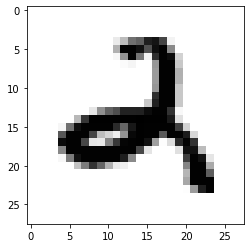

In [48]:
print_image(1900)

### Checking first 10 images ( Batch of Examples)

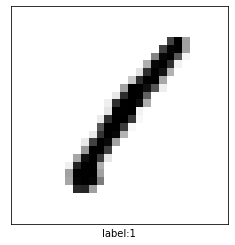

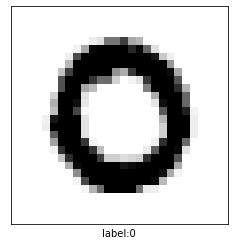

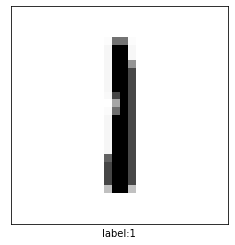

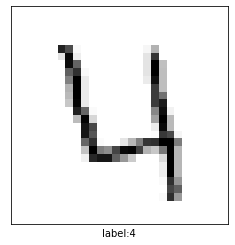

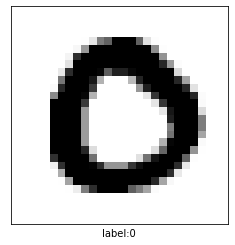

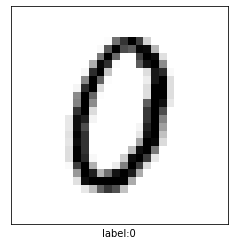

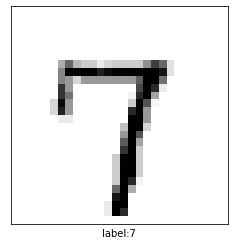

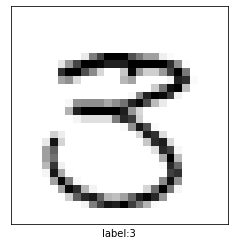

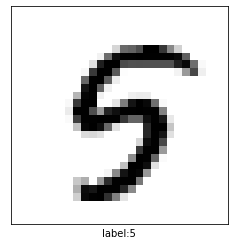

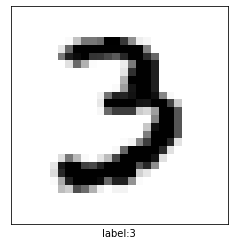

In [47]:
for i in range(10):
    #plt.subplot(5,4, i+1)
    plt.xticks([])
    plt.yticks([])
    print_image(i)
    plt.xlabel('label:{}'.format(y[i]))
    plt.show()

### Splitting dataset into train and test set 

In [6]:
x = df.drop('label', axis=1)
print("features shape: ", x.shape)
y = df.label
print("Target shape: ", y.shape)

features shape:  (42000, 784)
Target shape:  (42000,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [8]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (29400, 784)
Shape of y_train: (29400,)
Shape of X_test: (12600, 784)
Shape of y_test: (12600,)


<h2 align='center'> Logistic Regression </h2>

In [49]:
clf = LogisticRegression()
clf = clf.fit(X_train,y_train) 

### Predicting Values

In [50]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [51]:
y_pred_train

array([4, 0, 9, ..., 2, 6, 0], dtype=int64)

In [52]:
y_pred_test

array([8, 1, 9, ..., 5, 5, 0], dtype=int64)

###  Accuracy Score

In [54]:
print ("Accuracy on Training Data", clf.score(X_train, y_train))
print ("Accuracy on Test Data", clf.score(X_test, y_test))

Accuracy on Training Data 0.942108843537415
Accuracy on Test Data 0.915


In [58]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Confusion Matrix: 
[[1155    0    8    2    5   15   10    1    3    1]
 [   0 1349    9    6    1    3    1    2   16    2]
 [   8   13 1164   22   17   11   16   13   26    4]
 [   3    5   39 1181    1   51    3   14   39   19]
 [   5    4    7    2 1136    3   13    4   10   38]
 [  14    2    8   46   12  936   25    3   32    7]
 [  13    3   11    2   12   15 1191    1    7    1]
 [   3    4   16   14   17    2    1 1246    8   48]
 [   5   22   15   36    5   39    9    3 1063   12]
 [  13    3    4   16   32    9    0   37    9 1108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.96      0.97      0.97      1389
           2       0.91      0.90      0.90      1294
           3       0.89      0.87      0.88      1355
           4       0.92      0.93      0.92      1222
           5       0.86      0.86      0.86      1085
           6       0.94      0.95      0.94    

<h2 align='center'> Decision Tree </h2>

In [60]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train) 

### Predicting Values

In [61]:
y_pred_test_dtf = dt.predict(X_test)
y_pred_train_dtf = dt.predict(X_train)

In [62]:
y_pred_test_dtf

array([6, 1, 9, ..., 5, 5, 0], dtype=int64)

In [63]:
y_pred_train_dtf

array([4, 0, 9, ..., 2, 6, 0], dtype=int64)

### Accuracy Score 

In [64]:
print ("Accuracy on Training Data", dt.score(X_train, y_train))
print ("Accuracy on Test Data", dt.score(X_test, y_test))

Accuracy on Training Data 1.0
Accuracy on Test Data 0.846031746031746


In [65]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_test_dtf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_dtf))

Confusion Matrix: 
[[1072    3   22   17   17   22   17   10   11    9]
 [   0 1310   13   15    6    5    6    5   22    7]
 [  22   25 1066   32   20   17   19   30   44   19]
 [   9   22   45 1070   13   79    8   28   57   24]
 [   7   10   15   22 1039   16   19   13   27   54]
 [  10    7   17   76   14  847   40   17   37   20]
 [  20    5   29   13   27   27 1096    3   27    9]
 [  11   12   29   18   17   12    1 1213   12   34]
 [  10   21   44   53   36   42   27    8  948   20]
 [  15    4   13   29   55   25    7   44   40  999]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1200
           1       0.92      0.94      0.93      1389
           2       0.82      0.82      0.82      1294
           3       0.80      0.79      0.79      1355
           4       0.84      0.85      0.84      1222
           5       0.78      0.78      0.78      1085
           6       0.88      0.87      0.88    

<h2 align='center'> Random Forest </h2>

In [82]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
train_pred_rf = rf.predict(X_train)
pred_rf = rf.predict(X_test)

In [84]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.9625396825396826


In [75]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, pred_rf))

Confusion Matrix: 
[[1184    0    2    1    1    1    6    0    4    1]
 [   0 1374    6    2    1    2    3    1    0    0]
 [   5    4 1240    6   14    1    6    8    9    1]
 [   3    1   15 1267    1   24    2   16   16   10]
 [   2    0    1    0 1187    0    8    1    3   20]
 [   4    1    1   17    1 1035   13    0    7    6]
 [   9    3    2    0    5    6 1225    0    6    0]
 [   1    5   18    3   10    0    0 1295    2   25]
 [   2    7    3   10    4   10    5    2 1155   11]
 [   5    4    2   23   12    3    4   10    8 1160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1200
           1       0.98      0.99      0.99      1389
           2       0.96      0.96      0.96      1294
           3       0.95      0.94      0.94      1355
           4       0.96      0.97      0.97      1222
           5       0.96      0.95      0.96      1085
           6       0.96      0.98      0.97    

<h2 align='center'> Navive Bayes </h2>

In [66]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)

### Predicting Values

In [67]:
y_prednb_test = nb.predict(X_test)
y_prednb_train = nb.predict(X_train)

In [68]:
y_prednb_test

array([1, 1, 9, ..., 8, 8, 0], dtype=int64)

In [69]:
y_prednb_train

array([9, 0, 9, ..., 6, 6, 0], dtype=int64)

### Accuracy Score 

In [70]:
print ("Accuracy on Training Data", nb.score(X_train, y_train))
print ("Accuracy on Test Data", nb.score(X_test, y_test))

Accuracy on Training Data 0.5663605442176871
Accuracy on Test Data 0.5614285714285714


In [71]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_prednb_test))

print("\nClassification Report:")
print(classification_report(y_test, y_prednb_test))

Confusion Matrix: 
[[1095    1    4    5    0    5   49    1   23   17]
 [   1 1326    5    5    1    2   13    0   23   13]
 [ 157   46  372  106    5    6  334    6  248   14]
 [ 120  107    9  498    2    7   89   10  394  119]
 [  38   17   12    6  189   13  136    5  212  594]
 [ 161   36    7   25    5   96   86    2  561  106]
 [  14   25    3    1    0    6 1190    0   14    3]
 [   7   16    2   20   16    2    1  461   36  798]
 [  23  209    6   11    3    9   25    2  703  218]
 [  11   21    4    1    6    3    2   21   18 1144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1200
           1       0.74      0.95      0.83      1389
           2       0.88      0.29      0.43      1294
           3       0.73      0.37      0.49      1355
           4       0.83      0.15      0.26      1222
           5       0.64      0.09      0.16      1085
           6       0.62      0.95      0.75    

### Test Data 

In [85]:
df1 = pd.read_csv('test.csv')
df1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df1.shape

(28000, 784)

In [120]:
def print_testimage(index):
    some_digit = df1.iloc[index].values
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')

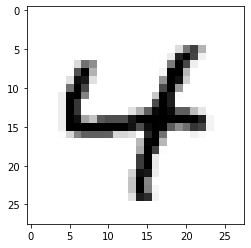

In [121]:
print_testimage(480)

In [122]:
testdata1 = clf.predict(df1)
testdata

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [123]:
testdata2 = dt.predict(df1)
testdata

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [124]:
testdata3 = nb.predict(df1)
testdata

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [125]:
testdata4 = rf.predict(df1)
testdata

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

### Random Prediction

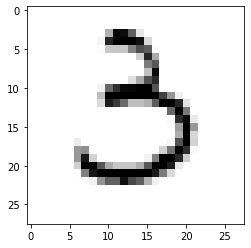

In [133]:
print_testimage(1897)

In [136]:
#Logistic Regression
testdata1[1897]

3

In [137]:
# DecisionTree
testdata2[1897]

3

In [131]:
# Naive Bayes
testdata3[1897]

1

In [139]:
# RandomForest
testdata4[1897]

3

- Digits are predicted correctly. Hence we can say that the model is pretty good in predicting handwritten digit.

<h2 align='center'> Conclusion :  </h2> 
<hr>

- RandomForest is best at predicting Handwritten digits ie it got accuracy of 96%
- Naive Bayes is not good for predciting Handwritten digits